In [144]:
# python libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import liana as li
import decoupler as dc

import session_info

In [145]:
# Setting up R dependencies
import anndata2ri
import rpy2
from rpy2.robjects import r
import random

anndata2ri.activate()

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [146]:
%%R
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(tidyr)
    library(dplyr)
    library(purrr)
    library(tibble)
})

In [147]:
%%R
library("nichenetr", lib="/home/d/danilina/mambaforge/envs/scanpy_r/lib/R/library")

In [148]:
# figure settings
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200, facecolor="white")
sc.set_figure_params(figsize=(5, 5))

In [149]:
adata = sc.read("../../../data/schiller_whl_anno.h5ad")
adata

AnnData object with n_obs × n_vars = 24071 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet', 'leiden_0.7', 'leiden', 'leiden_1.3', 'author_annotation', 'batch', 'condition', 'timepoint', 'leiden_0.5', 'manual_celltype_annotation', 'author_annotation_coarse'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell.type_colors', 'grouping_col

In [150]:
adata.obs[(adata.obs["condition"]=="healthy") & (adata.obs["manual_celltype_annotation"]=="Neutrophils")]

Unnamed: 0  nGene  nUMI orig.ident  \
312    muc4169_PBS_d14:muc4169_PBS_d14:CATGTCCAGAAA    276   357    muc4169   
441    muc4169_PBS_d14:muc4169_PBS_d14:TGTCCTAACCGT    326   667    muc4169   
754    muc4169_PBS_d14:muc4169_PBS_d14:TTGAGACACGTC    231   309    muc4169   
826    muc4169_PBS_d14:muc4169_PBS_d14:CACGTTAGCTCC    239   327    muc4169   
832    muc4169_PBS_d14:muc4169_PBS_d14:ATTAACCACAGC    346   522    muc4169   
1096   muc4169_PBS_d14:muc4169_PBS_d14:TTCGGTGTTATT    219   296    muc4169   
1479   muc4170_PBS_d21:muc4170_PBS_d21:ACCGGGACCCCG    335   588    muc4170   
1871   muc4170_PBS_d21:muc4170_PBS_d21:CTTGCCTCCGCC    319   524    muc4170   
1883   muc4170_PBS_d21:muc4170_PBS_d21:ATCCCATCGCAC    277   545    muc4170   
2107   muc4170_PBS_d21:muc4170_PBS_d21:TAAGCCCACTCC    205   327    muc4170   
2233   muc4170_PBS_d21:muc4170_PBS_d21:TCAACGGGCGAT    229   332    muc4170   
3633   muc4172_PBS_d10:muc4172_PBS_d10:TTCGCGGCTGTC    260   330    muc4172   
3659   muc4172_PBS_d10:muc4172_PBS_d10:CTCCAACGCATA    338   443    muc4172   
4010   muc4172_PBS_d10:muc4172_PBS_d10:CACTATTCATAC    340   523    muc4172   
4123   muc4172_PBS_d10:muc4172_PBS_d10:ACTGGATCGAGG    245   460    muc4172   
4473   muc4172_PBS_d10:muc4172_PBS_d10:TGGTTCGAGCTC    271   543    muc4172   
4638   muc4172_PBS_d10:muc4172_PBS_d10:GTGACCGTTTAT    326   436    muc4172   
4884   muc4173_PBS_d10:muc4173_PBS_d10:AACCTAATCGTC    214   334    muc4173   
5018   muc4173_PBS_d10:muc4173_PBS_d10:ACCATGAATCGA    207   299    muc4173   
5309   muc4173_PBS_d10:muc4173_PBS_d10:GCCGCTTTCCAC    268   414    muc4173   
5642   muc4173_PBS_d10:muc4173_PBS_d10:GGGTCACGCTCT    226   310    muc4173   
16443  muc4640_PBS_d28:muc4640_PBS_d28:CTTACAACCGAT    274   315    muc4640   
16459  muc4640_PBS_d28:muc4640_PBS_d28:TACATGAACTCT    254   355    muc4640   
17190  muc4640_PBS_d28:muc4640_PBS_d28:TTTTACACAAAG    691  1445    muc4640   
17252  muc4640_PBS_d28:muc4640_PBS_d28:TCGCGTCATCAG    222   337    muc4640   

            identifier  res.2 grouping    cell.type  metacelltype  \
312    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
441    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
754    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
826    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
832    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
1096   muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
1479   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
1871   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
1883   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
2107   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
2233   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
3633   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
3659   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4010   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4123   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4473   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4638   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4884   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5018   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5309   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5642   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
16443  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
16459  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
17190  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
17252  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   

      spline_cluster  ...  leiden_0.7  leiden  leiden_1.3  author_annotation  \
312     granulocytes  ...          15      18          20        Neutrophils   
441     granulocytes  ...      

/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


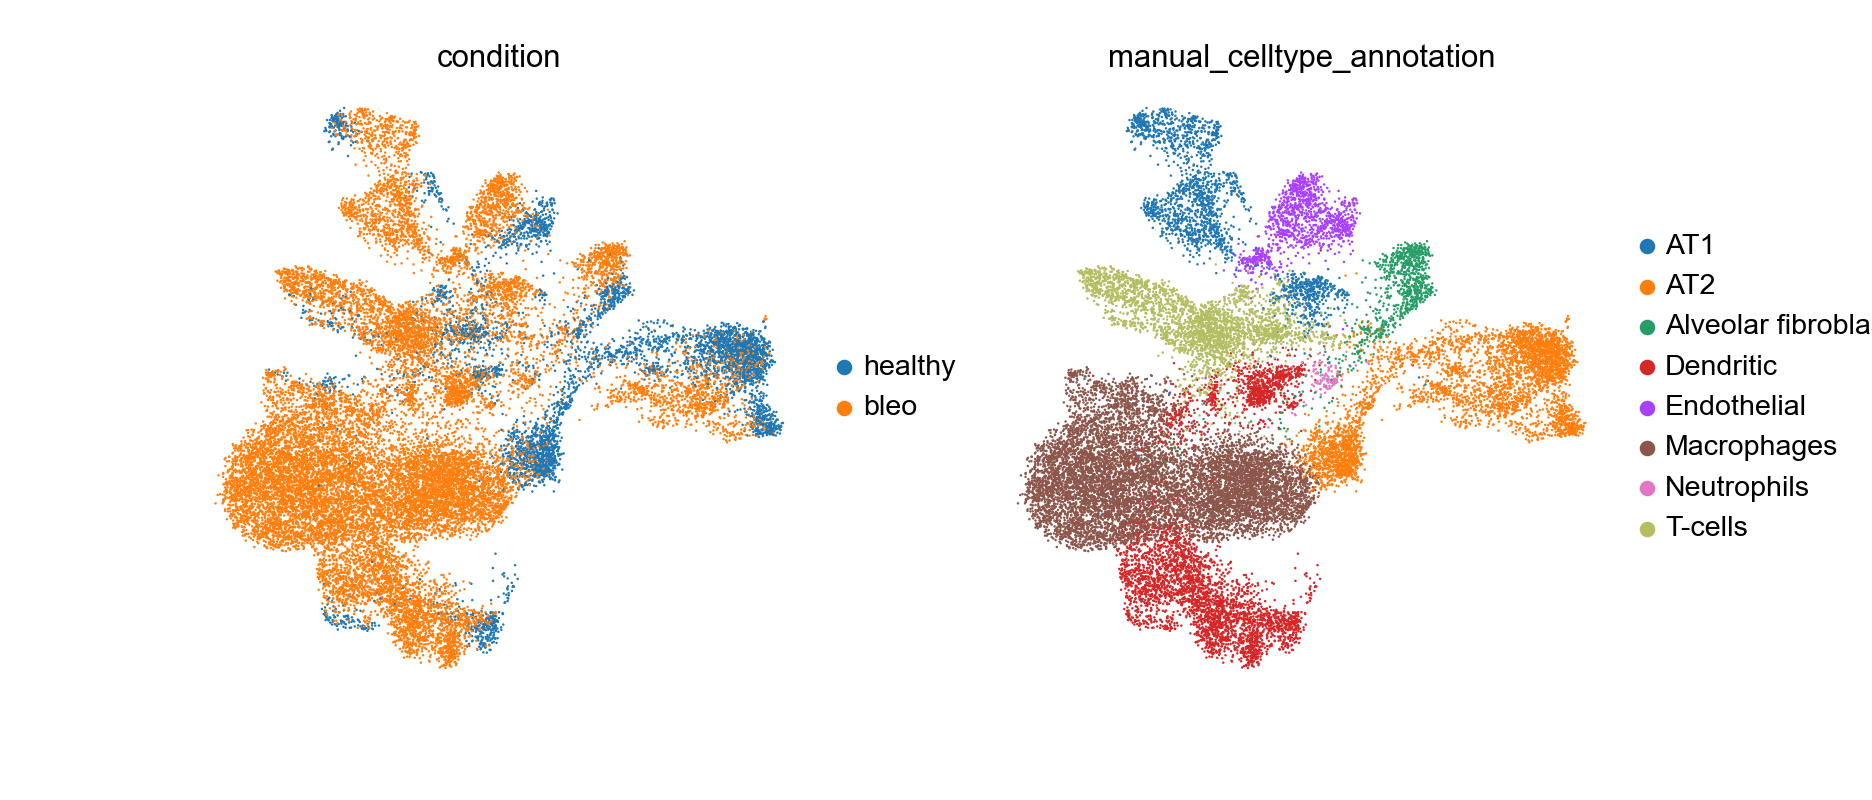

In [151]:
sc.pl.umap(adata, color=["condition", "manual_celltype_annotation"], frameon=False)

liana bleomycin

In [152]:
adata_bleo = adata[adata.obs["condition"]=="bleo"].copy()
adata_bleo

AnnData object with n_obs × n_vars = 19041 × 23400
    obs: 'Unnamed: 0', 'nGene', 'nUMI', 'orig.ident', 'identifier', 'res.2', 'grouping', 'cell.type', 'metacelltype', 'spline_cluster', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'doublet_score', 'predicted_doublet', 'is_doublet', 'leiden_0.7', 'leiden', 'leiden_1.3', 'author_annotation', 'batch', 'condition', 'timepoint', 'leiden_0.5', 'manual_celltype_annotation', 'author_annotation_coarse'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell.type_colors', 'grouping_col

In [153]:
from liana.method import rank_aggregate

In [154]:
rank_aggregate(
    adata_bleo, groupby="manual_celltype_annotation", resource_name = 'mouseconsensus', return_all_lrs=True, use_raw=False, verbose=True
)

Using `.X`!
2827 features of mat are empty, they will be removed.


/home/d/danilina/mambaforge/envs/scanpy_r/lib/python3.9/site-packages/pandas/core/indexing.py:1761: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.


0.13 of entities in the resource are missing from the data.
Generating ligand-receptor stats for 19041 samples and 20573 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:10<00:00, 98.82it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR
Running CellChat


100%|██████████| 1000/1000 [06:53<00:00,  2.42it/s]


In [155]:
adata_bleo.uns["liana_res"].drop_duplicates(
    ["ligand_complex", "receptor_complex"]
).sort_values(["magnitude_rank", "specificity_rank"]).head(20)

source       target ligand_complex receptor_complex  lr_means  \
968   Neutrophils  Endothelial         S100a8             Cd36  1.791616   
484   Neutrophils          AT2         S100a8             Ager  1.666854   
969   Neutrophils  Endothelial         S100a9             Cd36  1.562346   
1289  Neutrophils  Macrophages         S100a8             Cd68  1.629006   
485   Neutrophils          AT2         S100a9             Ager  1.437584   
1270  Neutrophils  Macrophages         S100a8            Itgb2  1.569317   
1290  Neutrophils  Macrophages         S100a9             Cd68  1.399736   
1271  Neutrophils  Macrophages         S100a9            Itgb2  1.340048   
957   Macrophages  Endothelial           Spp1            S1pr1  1.058630   
744   Endothelial    Dendritic            App             Cd74  0.972657   
1215  Macrophages  Macrophages           Apoe            Trem2  0.957286   
1611  Macrophages      T-cells            B2m             Cd3d  0.730582   
1613  Macrophages      T-cells            B2m             Cd3g  0.729638   
839           AT1  Endothelial         Col1a2             Cd36  0.658749   
826           AT1  Endothelial         Lgals1            Itgb1  0.550897   
1542          AT1      T-cells         Lgals1            Ptprc  0.509720   
1099          AT2  Macrophages           Lcn2            Fcgr3  0.458470   
838           AT1  Endothelial         Col1a1             Cd36  0.454143   
1053          AT1  Macrophages          Timp1             Cd63  0.447043   
418   Endothelial          AT2            App             Ager  0.377362   

      cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  \
968               0.0   1.834048       4.564552  2.714919     0.413048   
484               0.0   1.094314       4.485706  2.502325     0.482838   
969               0.0   1.550371       5.415304  2.510150     0.445191   
1289              0.0   0.869907       3.928307  2.379497     0.374098   
485               0.0   0.925053       5.336457  2.297555     0.520411   
1270              0.0   0.516005       3.867190  2.290228     0.262911   
1290              0.0   0.735357       4.779058  2.174728     0.403210   
1271              0.0   0.436193       4.717941  2.085458     0.283370   
957               0.0   0.420289       1.152792  1.363292     0.261995   
744               0.0   0.601420       0.821469  1.077201     0.086375   
1215              0.0   0.313418       0.406943  1.142010     0.160285   
1611              0.0   0.287119       0.686275  0.408588     0.119262   
1613              0.0   0.284802       0.695185  0.405664     0.137269   
839               0.0   0.432343       1.776106  1.255434     0.367707   
826               0.0   0.280579       0.602611  0.578809     0.079154   
1542              0.0   0.222745       0.517389  0.545963     0.088786   
1099              0.0   0.159298       1.154933  0.798160     0.138596   
838               0.0   0.179182       1.472402  0.857618     0.342980   
1053              0.0   0.191608       0.938575  0.638069     0.220375   
418               0.0   0.142335       0.863668  0.438133     0.107943   

       lrscore  lr_probs  cellchat_pvals  specificity_rank  magnitude_rank  
968   0.989733  0.099484             0.0      5.074309e-12    1.459811e-14  
484   0.986749  0.035897             0.0      5.074309e-12    3.941432e-13  
969   0.988844  0.085167             0.0      5.074309e-12    3.090210e-12  
1289  0.985162  0.030926             0.0      5.074309e-12    3.090210e-12  
485   0.985604  0.030422             0.0      5.074309e-12    3.142985e-11  
1270  0.980819  0.014717             0.0      5.074309e-12    4.005342e-11  
1290  0.983882  0.026189             0.0      5.074309e-12    4.828139e-11  
1271  0.979172  0.012431             0.0      5.074309e-12    5.978733e-11  
957   0.978790  0.013395             0.0      5.074309e-12    1.740461e-10  
744   0.982208  0.023107             0.0      5.074309e-12    3.862092e-10  
1215  0.9755

<AxesSubplot: xlabel='magnitude_rank', ylabel='Count'>

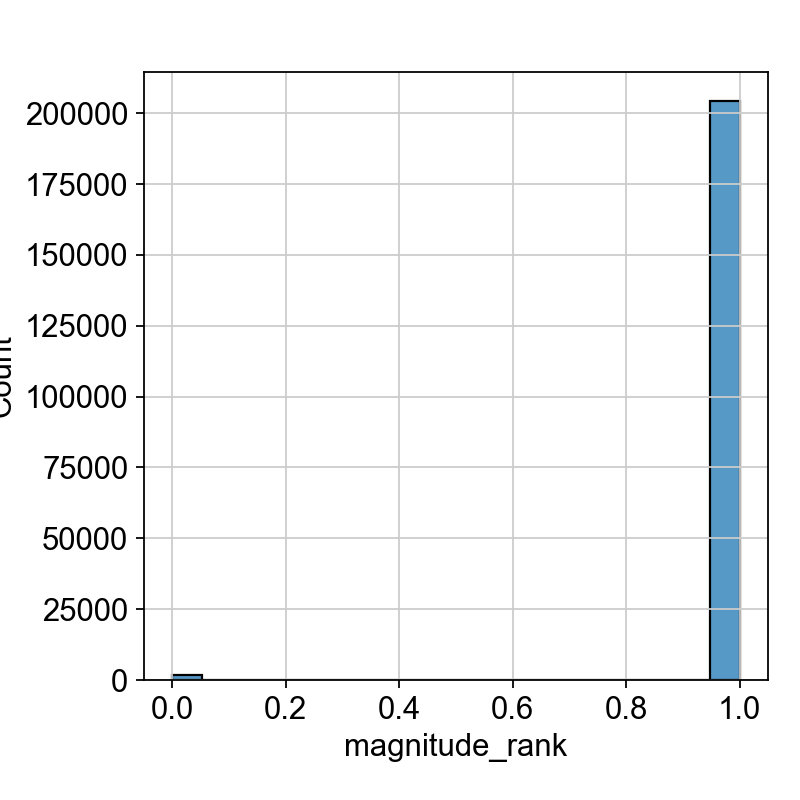

In [156]:
sns.histplot(adata_bleo.uns["liana_res"]["magnitude_rank"])

In [157]:
sc.set_figure_params(dpi=200)

consensus dotplot

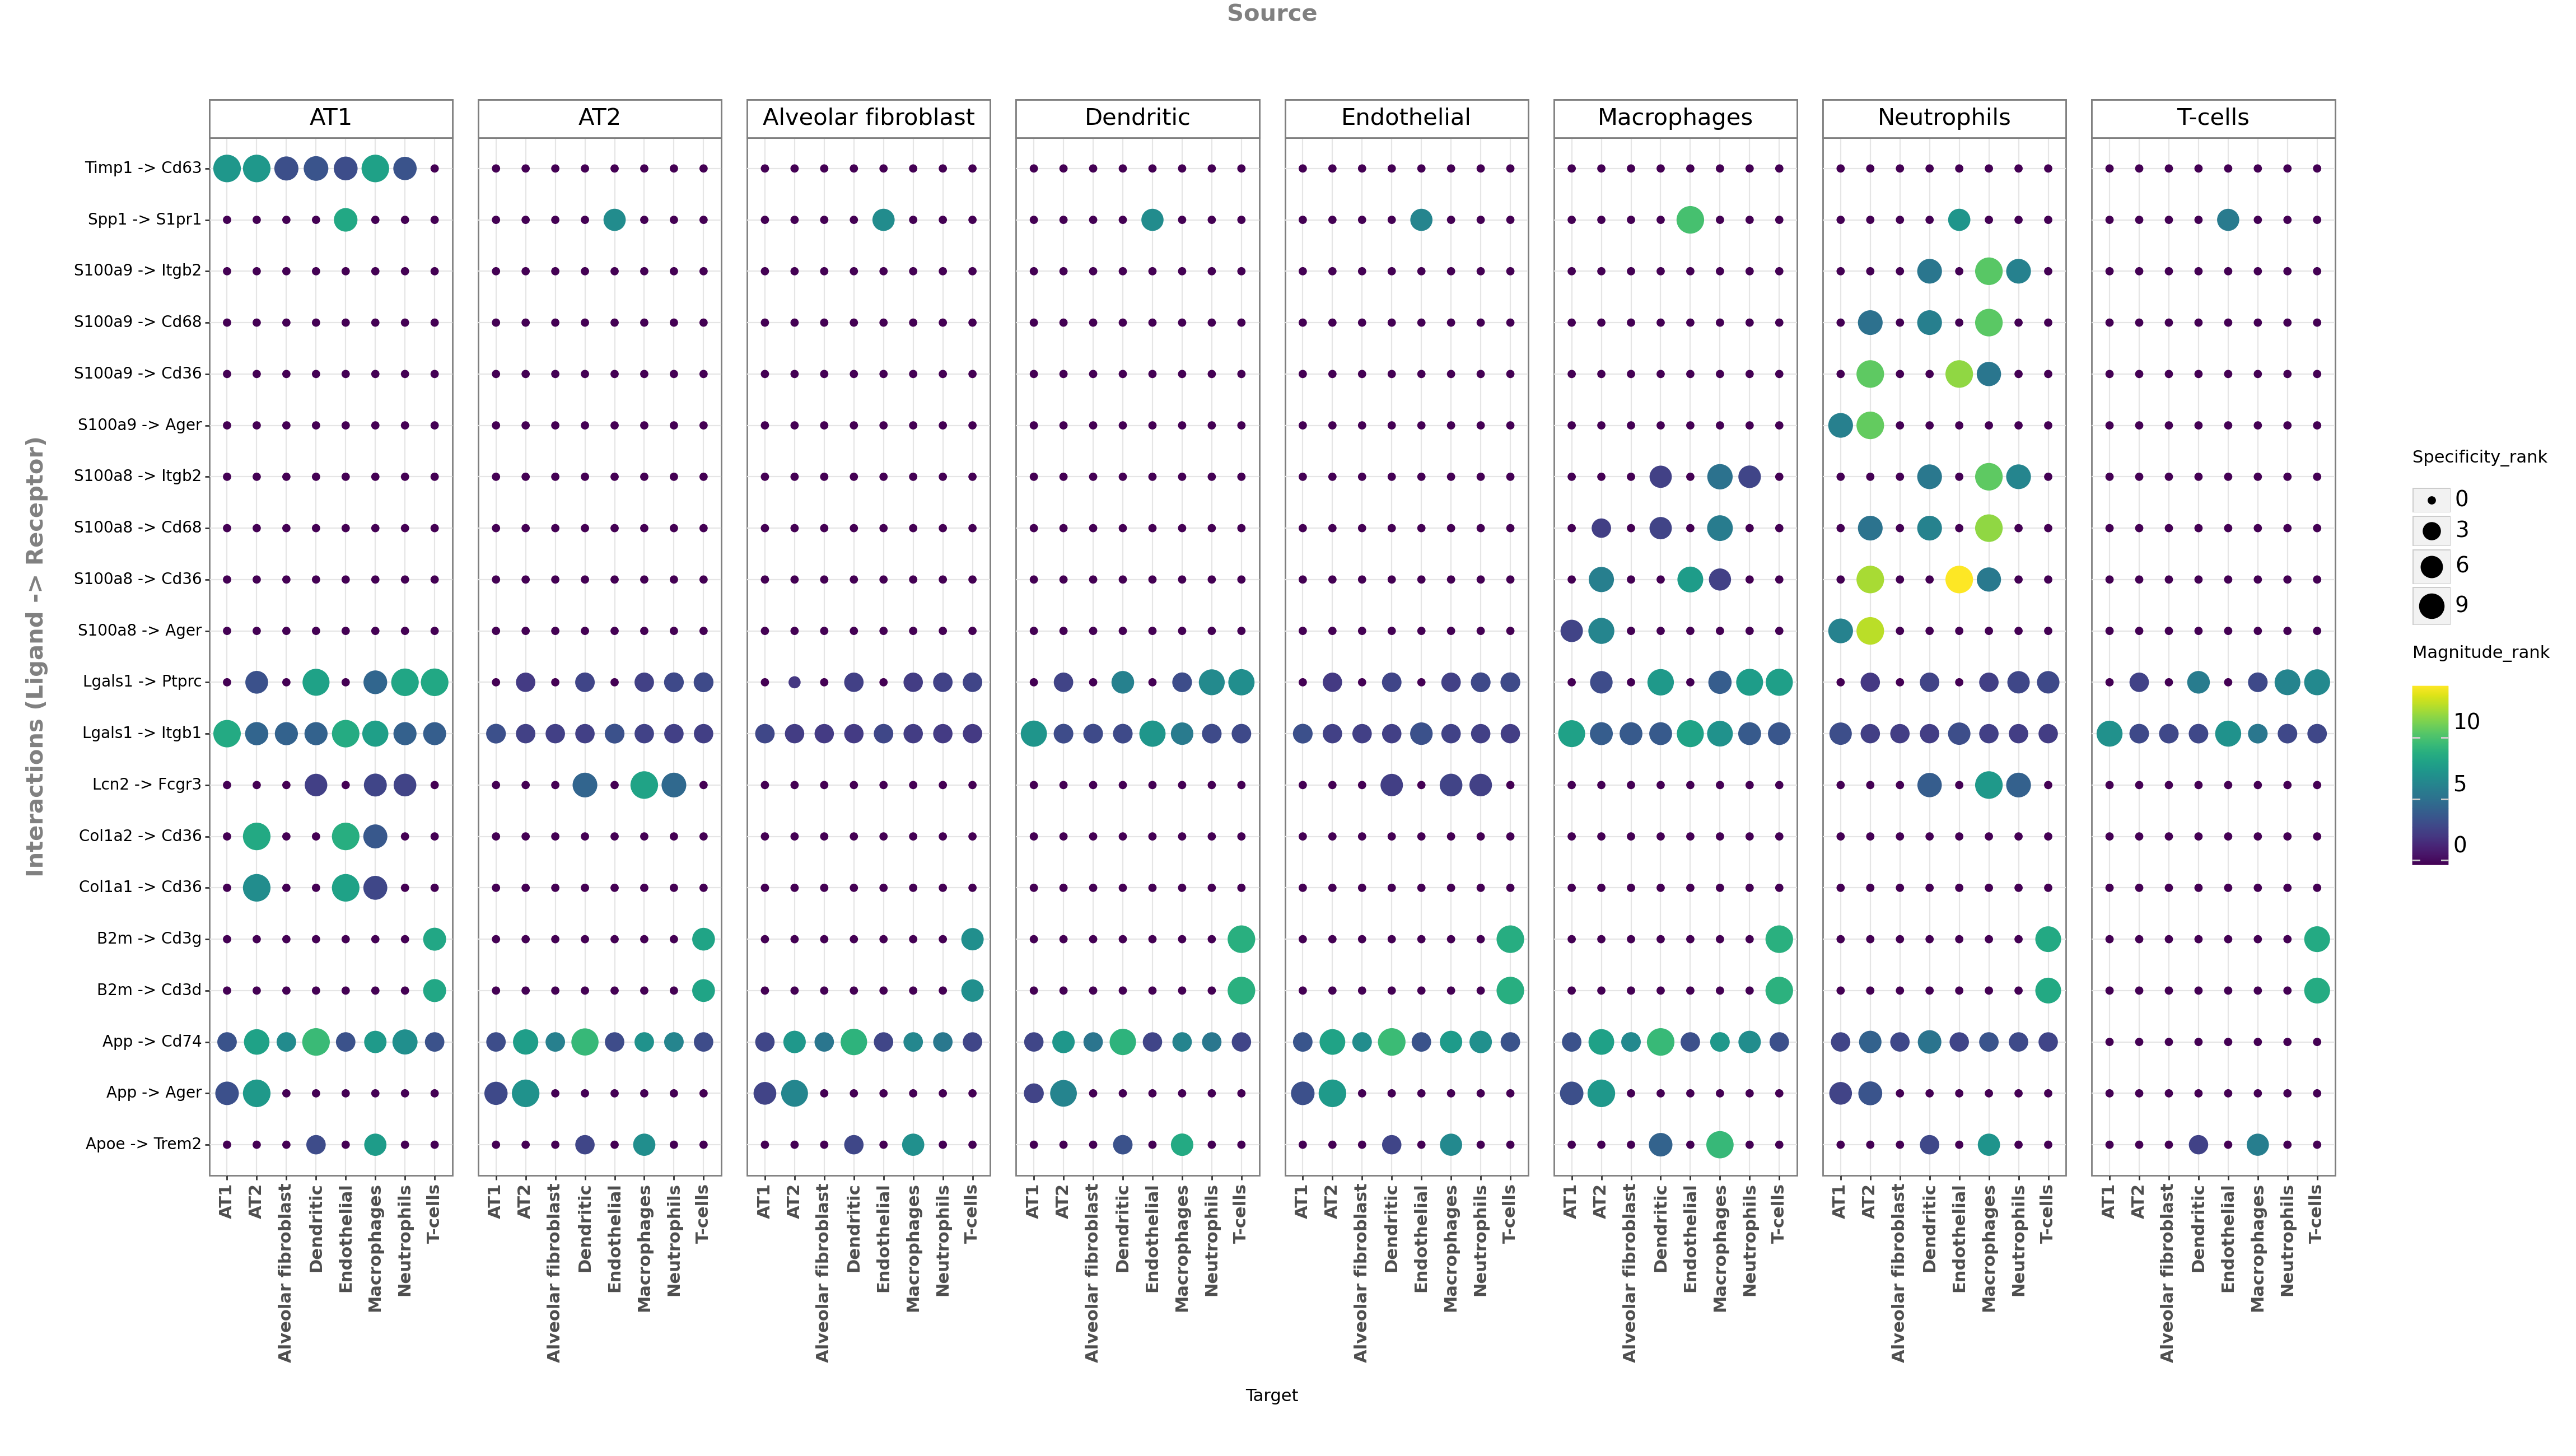

<Figure Size: (2300 x 1300)>

In [158]:
li.pl.dotplot(
    adata=adata_bleo,
    colour="magnitude_rank",
    size="specificity_rank",
    inverse_colour=True,  # we inverse sign since we want small p-values to have large sizes
    inverse_size=True,
    # We choose only the cell types which we wish to plot
    #source_labels=["Neutrophils", "Endothelial", "AT2", "AT1", "Macrophages"],
    #target_labels=["Endothelial", "AT2", "AT1","Macrophages", "T-cells"],
    # since the rank_aggregate can also be interpreted as a probability distribution
    # we can again filter them according to their specificity significance
    # yet here the interactions are filtered according to
    # how consistently highly-ranked is their specificity across the methods
    filterby="specificity_rank",
    filter_lambda=lambda x: x <= 0.05,
    # again, we can also further order according to magnitude
    orderby="magnitude_rank",
    orderby_ascending=True,  # prioritize those with lowest values
    top_n=20,  # and we want to keep only the top 20 interactions
    figure_size=(23, 13),
    #size_range=(1, 6),
)

Nichenet

In [159]:
%%R
# Increase timeout threshold
options(timeout=600)

# Load PK
ligand_target_matrix <- readRDS(url("https://zenodo.org/record/7074291/files/ligand_target_matrix_nsga2r_final_mouse.rds"))
lr_network <- readRDS(url("https://zenodo.org/record/7074291/files/lr_network_mouse_21122021.rds"))

In [162]:
list(adata.obs["manual_celltype_annotation"].cat.categories)

['AT1',
 'AT2',
 'Alveolar fibroblast',
 'Dendritic',
 'Endothelial',
 'Macrophages',
 'Neutrophils',
 'T-cells']

In [163]:
sender_celltypes = list(adata.obs["manual_celltype_annotation"].cat.categories)
receiver_celltypes = list(adata.obs["manual_celltype_annotation"].cat.categories)

In [164]:
# Helper function to obtain sufficiently expressed genes
from functools import reduce


def get_expressed_genes(adata, cell_type, expr_prop):
    # calculate proportions
    temp = adata[adata.obs["manual_celltype_annotation"] == cell_type, :]
    a = temp.X.getnnz(axis=0) / temp.X.shape[0]
    stats = (
        pd.DataFrame({"genes": temp.var_names, "props": a})
        .assign(cell_type=cell_type)
        .sort_values("genes")
    )

    # obtain expressed genes
    stats = stats[stats["props"] >= expr_prop]
    expressed_genes = stats["genes"].values

    return expressed_genes

In [165]:
sender_expressed = reduce(
    np.union1d,
    [
        get_expressed_genes(adata, cell_type=cell_type, expr_prop=0.1)
        for cell_type in sender_celltypes
    ],
)
receiver_expressed = reduce(
    np.union1d,
    [
        get_expressed_genes(adata, cell_type=cell_type, expr_prop=0.1)
        for cell_type in receiver_celltypes
    ],
)

In [166]:
%%R -i sender_expressed -i receiver_expressed
# get ligands and receptors in the resource
ligands <- lr_network %>% pull(from) %>% unique()
receptors <- lr_network %>% pull(to) %>% unique()

# only keep the intersect between the resource and the data
expressed_ligands <- intersect(ligands, sender_expressed)
expressed_receptors <- intersect(receptors, receiver_expressed)

# filter the network to only include ligands for which both the ligand and receptor are expressed
potential_ligands <- lr_network %>% 
  filter(from %in% expressed_ligands & to %in% expressed_receptors) %>%
  pull(from) %>% unique()

In [169]:
adata.obs

Unnamed: 0  nGene  nUMI orig.ident  \
0      muc4169_PBS_d14:muc4169_PBS_d14:CCATCCCGCCCG    288   366    muc4169   
1      muc4169_PBS_d14:muc4169_PBS_d14:ATCACCTATGCG    784  1429    muc4169   
2      muc4169_PBS_d14:muc4169_PBS_d14:CGCACCGACCAC    333   437    muc4169   
3      muc4169_PBS_d14:muc4169_PBS_d14:TCCTACTGGCAC    255   421    muc4169   
4      muc4169_PBS_d14:muc4169_PBS_d14:CCGGAAACGCGA    389   516    muc4169   
...                                             ...    ...   ...        ...   
29291  muc4657_PBS_d21:muc4657_PBS_d21:CGGGTCTCATCT    698   976    muc4657   
29292  muc4657_PBS_d21:muc4657_PBS_d21:ATCAAGACAGTG    340   670    muc4657   
29293  muc4657_PBS_d21:muc4657_PBS_d21:GACTGCGCATGG    223   263    muc4657   
29294  muc4657_PBS_d21:muc4657_PBS_d21:ATGACCGAATGT    240   436    muc4657   
29295  muc4657_PBS_d21:muc4657_PBS_d21:GTGTTTGGACCG    668  1081    muc4657   

            identifier  res.2 grouping       cell.type       metacelltype  \
0      muc4169_PBS_d14      5      PBS   T-lymphocytes            T_cells   
1      muc4169_PBS_d14      1      PBS       AT2 cells     alv_epithelium   
2      muc4169_PBS_d14     13      PBS            VECs  endothelial_cells   
3      muc4169_PBS_d14      1      PBS       AT2 cells     alv_epithelium   
4      muc4169_PBS_d14      5      PBS   T-lymphocytes            T_cells   
...                ...    ...      ...             ...                ...   
29291  muc4657_PBS_d21     11      PBS  Ciliated cells     ciliated_cells   
29292  muc4657_PBS_d21      1      PBS       AT2 cells     alv_epithelium   
29293  muc4657_PBS_d21     11      PBS  Ciliated cells     ciliated_cells   
29294  muc4657_PBS_d21      1      PBS       AT2 cells     alv_epithelium   
29295  muc4657_PBS_d21      5      PBS   T-lymphocytes            T_cells   

       spline_cluster  ...  leiden_0.7  leiden  leiden_1.3  author_annotation  \
0             t_cells  ...           3       4           3      T-lymphocytes   
1      alv_epithelium  ...           4       2           2          AT2 cells   
2                 vec  ...           5       7           7               VECs   
3      alv_epithelium  ...          11      14          14          AT2 cells   
4             t_cells  ...           3       4           3      T-lymphocytes   
...               ...  ...         ...     ...         ...                ...   
29291  ciliated_cells  ...           9      11          11     Ciliated cells   
29292  alv_epithelium  ...           4      17          17          AT2 cells   
29293  ciliated_cells  ...           9      11          11     Ciliated cells   
29294  alv_epithelium  ...           4      17          17          AT2 cells   
29295         t_cells  ...           3       4           3      T-lymphocytes   

         batch  condition  timepoint  leiden_0.5  manual_celltype_annotation  \
0      muc4169    healthy        d14           4                     T-cells   
1      muc4169    healthy        d14           3                         AT2   
2      muc4169    healthy        d14           6                 Endothelial   
3      muc4169    healthy        d14           3                         AT2   
4      muc4169    healthy        d14           4                     T-cells   
...        ...        ...        ...         ...                         ...   
29291  muc4657    healthy        d21           8         Alveolar fibroblast   
29292  muc4657    healthy        d21           3                         AT2   
29293  muc4657    healthy        d21           8         Alveolar fibroblast   
29294  muc4657    healthy        d21           3                         AT2   
29295  muc4657    healthy        d21           4                     T-cells   

       author_annotation_coarse  
0                       T_cells  
1                alv_epithelium  
2             endothelial_cells  
3                alv_epithelium  
4                       T_cells  
...                         .

In [181]:
# Get pseudo-bulk profile
pdata = dc.get_pseudobulk(
    adata,
    sample_col="batch",
    groups_col="manual_celltype_annotation",
    min_prop=0.1,
    min_smpls=3,
    layer="raw_counts",
)

In [182]:
# Storing the raw counts
pdata.layers["counts"] = pdata.X.copy()

# Does PC1 captures a meaningful biological or technical fact?
pdata.obs["lib_size"] = pdata.X.sum(1)

# Normalize
sc.pp.normalize_total(pdata, target_sum=None)
sc.pp.log1p(pdata)
# check how this looks like
pdata

AnnData object with n_obs × n_vars = 186 × 4993
    obs: 'orig.ident', 'identifier', 'grouping', 'outlier', 'mt_outlier', 'batch', 'condition', 'timepoint', 'manual_celltype_annotation', 'psbulk_n_cells', 'psbulk_counts', 'lib_size'
    var: 'gene_name', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p'
    layers: 'psbulk_props', 'counts'

In [183]:
pdata.obs[(pdata.obs["condition"]=="healthy") & (pdata.obs["manual_celltype_annotation"]=="Neutrophils")]

Empty DataFrame
Columns: [orig.ident, identifier, grouping, outlier, mt_outlier, batch, condition, timepoint, manual_celltype_annotation, psbulk_n_cells, psbulk_counts, lib_size]
Index: []

In [184]:
adata.obs[(adata.obs["condition"]=="healthy") & (adata.obs["manual_celltype_annotation"]=="Neutrophils")]

Unnamed: 0  nGene  nUMI orig.ident  \
312    muc4169_PBS_d14:muc4169_PBS_d14:CATGTCCAGAAA    276   357    muc4169   
441    muc4169_PBS_d14:muc4169_PBS_d14:TGTCCTAACCGT    326   667    muc4169   
754    muc4169_PBS_d14:muc4169_PBS_d14:TTGAGACACGTC    231   309    muc4169   
826    muc4169_PBS_d14:muc4169_PBS_d14:CACGTTAGCTCC    239   327    muc4169   
832    muc4169_PBS_d14:muc4169_PBS_d14:ATTAACCACAGC    346   522    muc4169   
1096   muc4169_PBS_d14:muc4169_PBS_d14:TTCGGTGTTATT    219   296    muc4169   
1479   muc4170_PBS_d21:muc4170_PBS_d21:ACCGGGACCCCG    335   588    muc4170   
1871   muc4170_PBS_d21:muc4170_PBS_d21:CTTGCCTCCGCC    319   524    muc4170   
1883   muc4170_PBS_d21:muc4170_PBS_d21:ATCCCATCGCAC    277   545    muc4170   
2107   muc4170_PBS_d21:muc4170_PBS_d21:TAAGCCCACTCC    205   327    muc4170   
2233   muc4170_PBS_d21:muc4170_PBS_d21:TCAACGGGCGAT    229   332    muc4170   
3633   muc4172_PBS_d10:muc4172_PBS_d10:TTCGCGGCTGTC    260   330    muc4172   
3659   muc4172_PBS_d10:muc4172_PBS_d10:CTCCAACGCATA    338   443    muc4172   
4010   muc4172_PBS_d10:muc4172_PBS_d10:CACTATTCATAC    340   523    muc4172   
4123   muc4172_PBS_d10:muc4172_PBS_d10:ACTGGATCGAGG    245   460    muc4172   
4473   muc4172_PBS_d10:muc4172_PBS_d10:TGGTTCGAGCTC    271   543    muc4172   
4638   muc4172_PBS_d10:muc4172_PBS_d10:GTGACCGTTTAT    326   436    muc4172   
4884   muc4173_PBS_d10:muc4173_PBS_d10:AACCTAATCGTC    214   334    muc4173   
5018   muc4173_PBS_d10:muc4173_PBS_d10:ACCATGAATCGA    207   299    muc4173   
5309   muc4173_PBS_d10:muc4173_PBS_d10:GCCGCTTTCCAC    268   414    muc4173   
5642   muc4173_PBS_d10:muc4173_PBS_d10:GGGTCACGCTCT    226   310    muc4173   
16443  muc4640_PBS_d28:muc4640_PBS_d28:CTTACAACCGAT    274   315    muc4640   
16459  muc4640_PBS_d28:muc4640_PBS_d28:TACATGAACTCT    254   355    muc4640   
17190  muc4640_PBS_d28:muc4640_PBS_d28:TTTTACACAAAG    691  1445    muc4640   
17252  muc4640_PBS_d28:muc4640_PBS_d28:TCGCGTCATCAG    222   337    muc4640   

            identifier  res.2 grouping    cell.type  metacelltype  \
312    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
441    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
754    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
826    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
832    muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
1096   muc4169_PBS_d14     20      PBS  Neutrophils  granulocytes   
1479   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
1871   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
1883   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
2107   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
2233   muc4170_PBS_d21     20      PBS  Neutrophils  granulocytes   
3633   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
3659   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4010   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4123   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4473   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4638   muc4172_PBS_d10     20      PBS  Neutrophils  granulocytes   
4884   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5018   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5309   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
5642   muc4173_PBS_d10     20      PBS  Neutrophils  granulocytes   
16443  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
16459  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
17190  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   
17252  muc4640_PBS_d28     20      PBS  Neutrophils  granulocytes   

      spline_cluster  ...  leiden_0.7  leiden  leiden_1.3  author_annotation  \
312     granulocytes  ...          15      18          20        Neutrophils   
441     granulocytes  ...      

In [185]:
logFCs, pvals = dc.get_contrast(
    pdata,
    group_col="manual_celltype_annotation",
    condition_col="condition",
    condition="bleo",
    reference="healthy",
    method="t-test",
)

Skipping group "Neutrophils" since reference "healthy" not in column "condition".


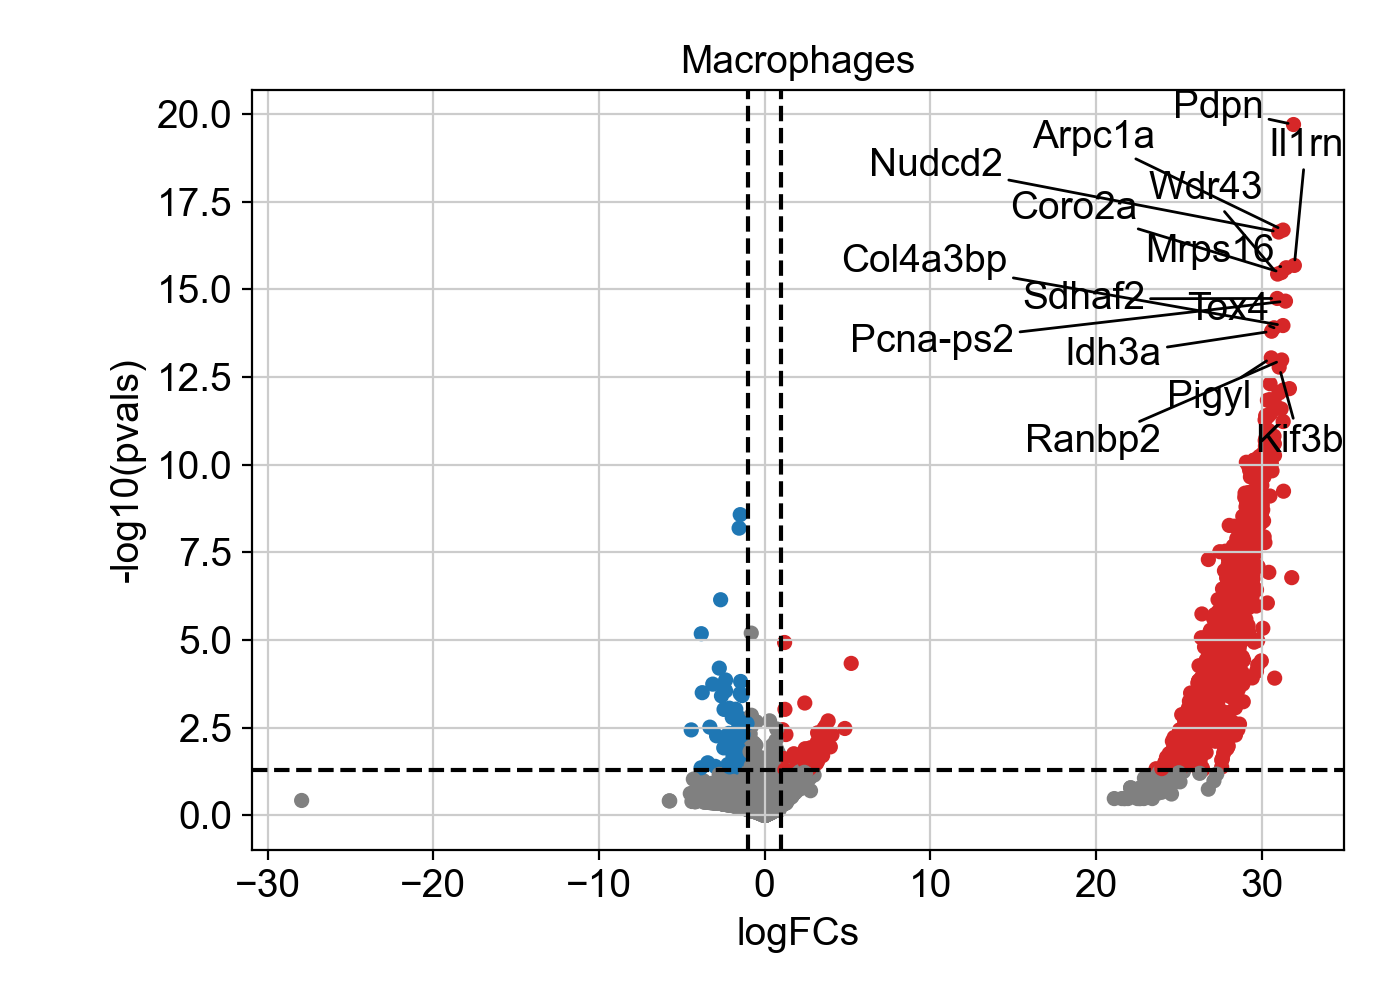

In [186]:
# Visualize those for e.g. CD14+ Monocytes
dc.plot_volcano(logFCs, pvals, "Macrophages", top=15, sign_thr=0.05, lFCs_thr=1)

In [187]:
# format results
deg = dc.format_contrast_results(logFCs, pvals)
# only keep the receiver cell type(s)
deg = deg[np.isin(deg["contrast"], receiver_celltypes)]
deg.head(15)

contrast      name     logFCs         pvals adj_pvals
0       AT1    Igfbp6  -3.144108  7.193551e-12       0.0
1       AT1      Emc8  30.526377  3.357577e-11       0.0
2       AT1      Aqp1  -3.251926  7.695071e-11       0.0
3       AT1    Igfbp5  -2.427581  3.002020e-09  0.000003
4       AT1       Tnc   5.607329  3.463547e-09  0.000003
5       AT1      Prc1  31.405436  3.486247e-09  0.000003
6       AT1     Cldn4  31.262344  4.514936e-09  0.000003
7       AT1    Efemp1  -2.554359  6.608376e-09  0.000004
8       AT1      Nans  30.611944  2.189816e-08  0.000011
9       AT1     Upk3b  -2.644433  2.375305e-08  0.000011
10      AT1    Nkain4  -1.910130  2.524172e-08  0.000011
11      AT1      Plk2  30.978119  5.365651e-08  0.000022
12      AT1  Serpine1  31.721930  6.689623e-08  0.000025
13      AT1     Crim1  -2.292297  6.927049e-08  0.000025
14      AT1     Ahnak  -0.986752  9.736767e-08  0.000032

In [188]:
# define background of sufficiently expressed genes
background_genes = deg["name"].values

# only keep significant and positive DE genes
deg = deg[(deg["pvals"] <= 0.05) & (deg["logFCs"] > 1)]
# get geneset of interest
geneset_oi = deg["name"].values

In [189]:
%%R -i geneset_oi -i background_genes -o ligand_activities

ligand_activities <- predict_ligand_activities(geneset = geneset_oi, 
                                               background_expressed_genes = background_genes,
                                               ligand_target_matrix = ligand_target_matrix,
                                               potential_ligands = potential_ligands)

ligand_activities <- ligand_activities %>% 
  arrange(-aupr) %>% 
  mutate(rank = rank(desc(aupr)))

# show top10 ligand activities
head(ligand_activities, n=10)

# A tibble: 10 × 6
   test_ligand auroc  aupr aupr_corrected pearson  rank
   <chr>       <dbl> <dbl>          <dbl>   <dbl> <dbl>
 1 S100a4      0.546 0.161         0.0428  0.0802     1
 2 Areg        0.532 0.159         0.0411  0.0760     2
 3 Hc          0.542 0.157         0.0391  0.0503     3
 4 Ifitm6      0.548 0.156         0.0378  0.0763     4
 5 Hp          0.538 0.155         0.0373  0.0665     5
 6 Il1b        0.539 0.155         0.0371  0.0901     6
 7 S100a8      0.535 0.155         0.0364  0.0661     7
 8 Podxl       0.522 0.153         0.0348  0.0499     8
 9 Sirpb1c     0.522 0.152         0.0334  0.0531     9
10 C1qb        0.524 0.152         0.0334  0.0526    10


In [190]:
%%R -o vis_ligand_target
top_ligands <- ligand_activities %>%
  top_n(15, aupr) %>% 
  arrange(-aupr) %>%
  pull(test_ligand) %>%
  unique()

# get regulatory potentials
ligand_target_potential <- map(top_ligands,
                               ~get_weighted_ligand_target_links(.x,
                                                                 geneset = geneset_oi,
                                                                 ligand_target_matrix = ligand_target_matrix,
                                                                 n = 500)
                              ) %>%
    bind_rows() %>% 
    drop_na()
    
# prep for visualization
active_ligand_target_links <- 
  prepare_ligand_target_visualization(ligand_target_df = ligand_target_potential, 
                                      ligand_target_matrix = ligand_target_matrix)

# order ligands & targets
order_ligands <- intersect(top_ligands,
                           colnames(active_ligand_target_links)) %>% rev() %>% make.names()
order_targets <- ligand_target_potential$target %>%
  unique() %>% 
  intersect(rownames(active_ligand_target_links)) %>%
  make.names()
rownames(active_ligand_target_links) <- rownames(active_ligand_target_links) %>%
  make.names() # make.names() for heatmap visualization of genes like H2-T23
colnames(active_ligand_target_links) <- colnames(active_ligand_target_links) %>%
  make.names() # make.names() for heatmap visualization of genes like H2-T23

vis_ligand_target <- active_ligand_target_links[order_targets, order_ligands] %>%
  t()
    
# convert to dataframe, and then it's returned to py
vis_ligand_target <- vis_ligand_target %>%
    as.data.frame() %>%
    rownames_to_column("ligand") %>%
    as_tibble()

In [191]:
# convert dot to underscore and set ligand as index
vis_ligand_target["ligand"] = vis_ligand_target["ligand"].replace("\.", "_", regex=True)
vis_ligand_target.set_index("ligand", inplace=True)
# keep only columns where at least one gene has a regulatory potential >= 0.05
vis_ligand_target = vis_ligand_target.loc[
    :, vis_ligand_target[vis_ligand_target >= 0.05].any()
]
vis_ligand_target.head()

Abcb1a  Ackr3     Anxa1     Anxa3  Asf1b      Atf3       Bax  \
ligand                                                                   
Pf4     0.006056    0.0  0.000000  0.000000    0.0  0.007315  0.006976   
Tgfbi   0.007319    0.0  0.000000  0.006049    0.0  0.010232  0.008759   
Sell    0.000000    0.0  0.000000  0.000000    0.0  0.009343  0.007221   
Esam    0.008085    0.0  0.007092  0.007383    0.0  0.008525  0.009895   
Col6a2  0.000000    0.0  0.000000  0.000000    0.0  0.007831  0.006920   

          Bcl2l1   Bhlhe40     Birc5  ...    Igfbp6      Myrf      Nme5  \
ligand                                ...                                 
Pf4     0.008488  0.007162  0.006435  ...  0.064949  0.065667  0.067331   
Tgfbi   0.010608  0.009761  0.009084  ...  0.000000  0.000000  0.000000   
Sell    0.009340  0.007967  0.007024  ...  0.000000  0.000000  0.000000   
Esam    0.009957  0.007030  0.007398  ...  0.000000  0.000000  0.000000   
Col6a2  0.008874  0.007032  0.007307  ...  0.000000  0.000000  0.000000   

             Ogn     Plce1     Prex2  St6galnac2     Tead1   Tmem100      Ttc9  
ligand                                                                          
Pf4     0.067847  0.065742  0.067597    0.065809  0.064359  0.065581  0.065595  
Tgfbi   0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  
Sell    0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  
Esam    0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  
Col6a2  0.000000  0.000000  0.000000    0.000000  0.000000  0.000000  0.000000  

[5 rows x 249 columns]

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(40, 10))
sns.heatmap(vis_ligand_target, xticklabels=True, ax=ax)
plt.show()

In [197]:
ligand_oi = ligand_activities.head(5)["test_ligand"].values
ligand_oi

array(['S100a4', 'Areg', 'Hc', 'Ifitm6', 'Hp'], dtype=object)

plots

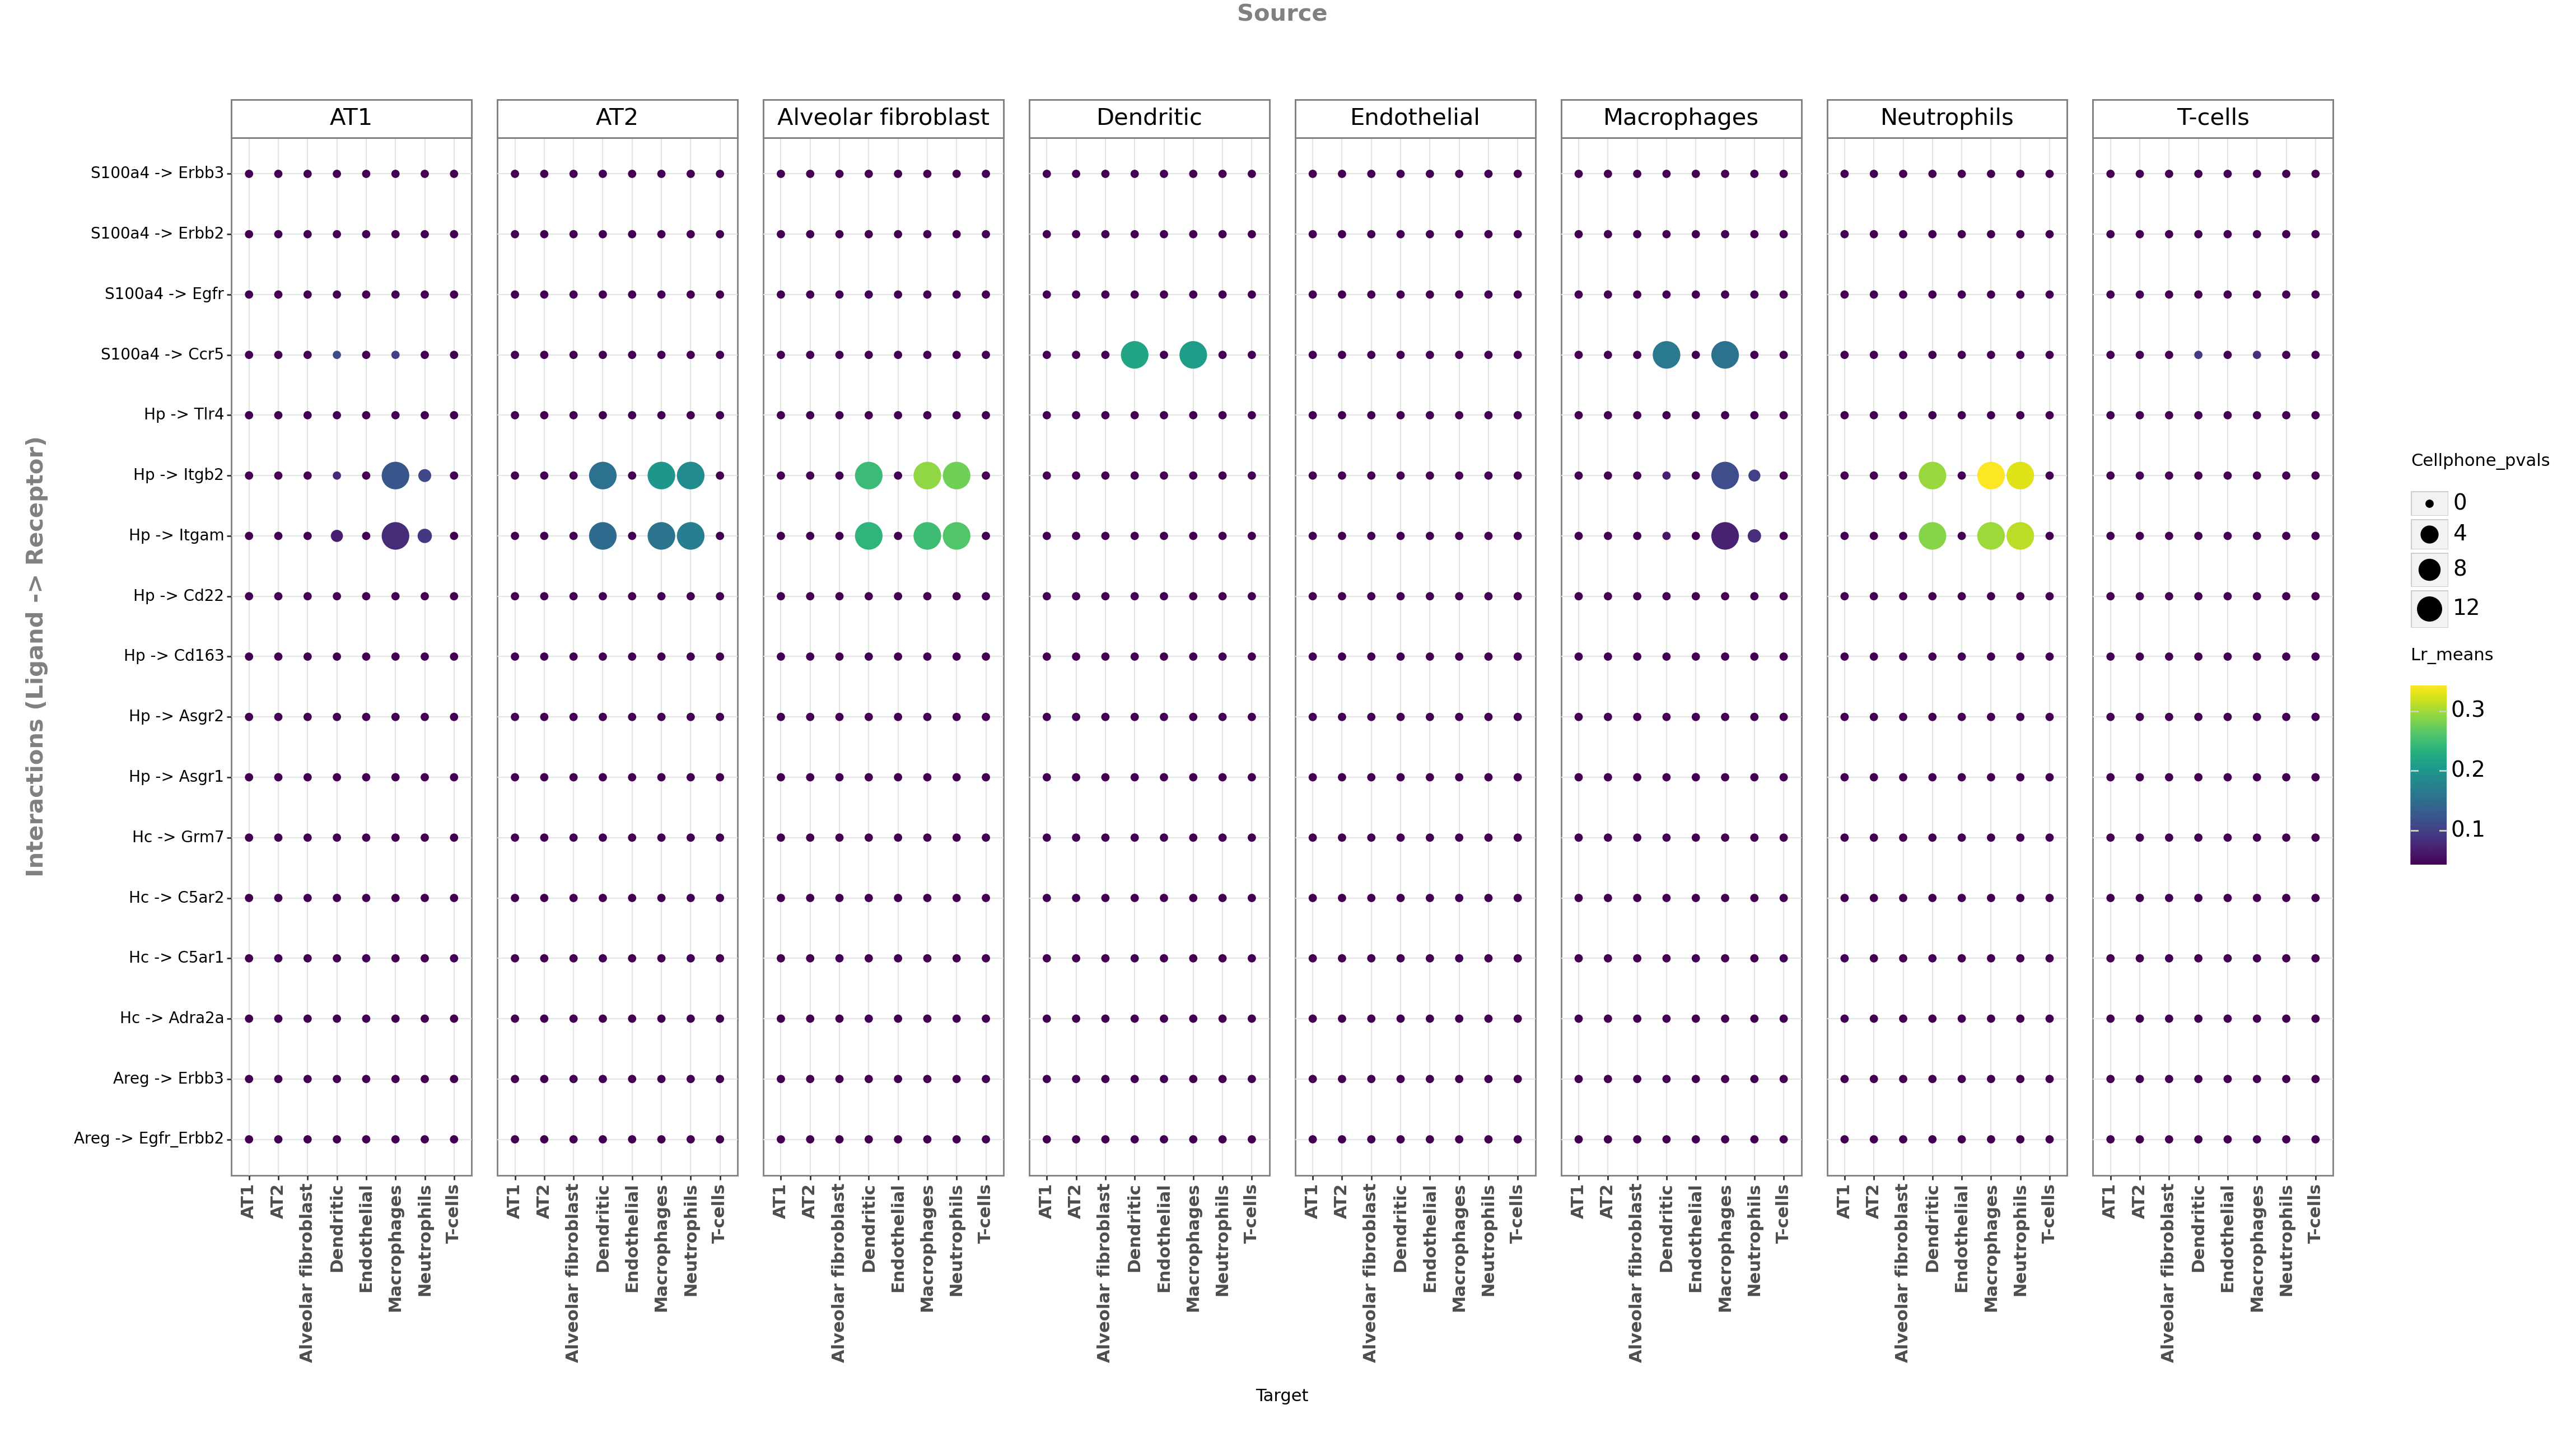

<Figure Size: (2300 x 1300)>

In [198]:
li.pl.dotplot(
    adata=adata_bleo,
    colour="lr_means",
    size="cellphone_pvals",
    inverse_size=True,  # we inverse sign since we want small p-values to have large sizes
    # We choose only the cell types which we wish to plot
    source_labels=sender_celltypes,
    target_labels=receiver_celltypes,
    # keep only those ligands
    filterby="ligand_complex",
    filter_lambda=lambda x: np.isin(x, ligand_oi),
    # as this type of methods tends to result in large numbers
    # of predictions, we can also further order according to
    # expression magnitude
    orderby="magnitude_rank",
    orderby_ascending=False,  # we want to prioritize those with highest expression
    top_n=25,  # and we want to keep only the top 25 interactions
    figure_size=(23, 13),
    #size_range=(1, 6),
)